In [28]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("/content/drive/MyDrive/exp56/hack/Complete-Dataset.zip (Unzipped Files)/Complete Dataset/Phising_Training_Dataset.zip (Unzipped Files)/Phising_Training_Dataset.csv")

In [29]:
#shuffling the dataset
df = df.sample(frac=1)

In [30]:
#splitting the dataset into X and y

#taking top 15 cols after doing feature selection
cols = ['having_Sub_Domain',
 'port',
 'HTTPS_token',
 'web_traffic',
 'URL_Length',
 'Google_Index',
 'Links_in_tags',
 'Page_Rank',
 'Links_pointing_to_page',
 'age_of_domain',
 'Prefix_Suffix',
 'Domain_registeration_length',
 'Statistical_report',
 'SFH',
 'having_At_Symbol']
y = df['Result']
X = df[cols]

In [31]:
#train test split
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [32]:
y_test=y_test.replace(-1,0)
y_train=y_train.replace(-1,0)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
KNN = KNeighborsClassifier(algorithm= 'ball_tree', 
                           leaf_size= 10, 
                           metric = 'minkowski', 
                           n_jobs  = -1,
                           n_neighbors = 10,
                           p = 1, 
                           weights =  'distance')


In [35]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_jobs=-1,
                     n_neighbors=10, p=1, weights='distance')

In [36]:
print(KNN.score(X_train,y_train))

0.9269960915689559


In [37]:
y_pred = KNN.predict(X_test)

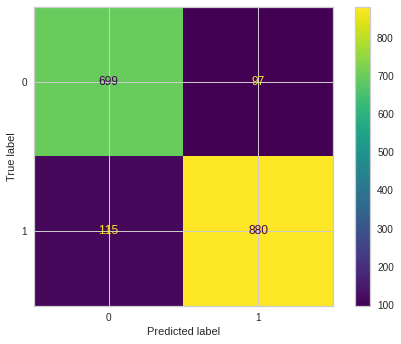

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       796
           1       0.90      0.88      0.89       995

    accuracy                           0.88      1791
   macro avg       0.88      0.88      0.88      1791
weighted avg       0.88      0.88      0.88      1791



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


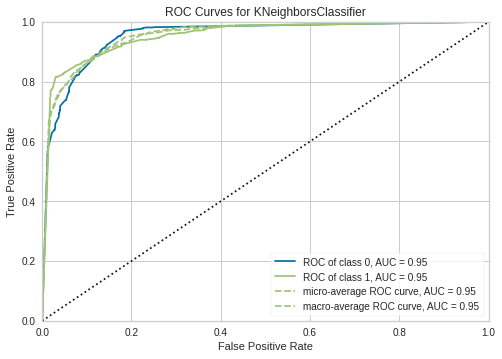

In [40]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(KNN, classes=[0, 1])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  


#Test


In [41]:
test = pd.read_csv("/content/drive/MyDrive/exp56/hack/Complete-Dataset.zip (Unzipped Files)/Complete Dataset/Phising_Testing_Dataset.zip (Unzipped Files)/Phising_Testing_Dataset.csv")

In [42]:
test.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1


In [43]:
test_data = test[cols]

In [44]:
test_data.head()

,having_Sub_Domain,port,HTTPS_token,web_traffic,URL_Length,Google_Index,Links_in_tags,Page_Rank,Links_pointing_to_page,age_of_domain,Prefix_Suffix,Domain_registeration_length,Statistical_report,SFH,having_At_Symbol
0,-1,1,1,1,1,-1,0,1,0,1,1,-1,1,1,1
1,0,1,1,0,-1,-1,-1,-1,0,-1,-1,1,1,-1,1
2,0,-1,1,1,-1,1,-1,-1,1,1,-1,-1,-1,-1,1
3,-1,-1,-1,1,-1,1,1,-1,1,1,-1,1,-1,-1,1
4,1,1,1,1,-1,1,1,-1,0,1,-1,-1,1,-1,1


In [45]:
test_pred = KNN.predict(test_data)

In [46]:
test_pred

array([1, 0, 0, ..., 0, 1, 1])

In [47]:
test_pred=test_pred.replace(0,-1)

AttributeError: ignored

In [48]:
submission = pd.DataFrame(test['key'])

In [49]:
for i in range(len(test_pred)):
    if test_pred[i]==0:
        test_pred[i]=-1

In [50]:
submission['Result'] = test_pred

In [51]:
submission.head()

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1


In [52]:
submission.to_csv("submission_2.csv",index=False,header=['key','Result'])